# Pyroot Tutorial (Very Basic)

In [40]:
# Wir laden Pyroot ...
import ROOT

In [2]:
# Wir öffen die Datei ...
file = ROOT.TFile.Open("uproot/tutorial.root")

In [3]:
# Wir sehen den Pointer zum TFile 
file

In [4]:
# Wir checken welche Trees/Keys verfügbar sind mithilfe von GetListOfKeys(), wir erhalten eine Liste
keys = file.GetListOfKeys()
for key in keys:
    print(key.GetName())

all
alpha


In [5]:
# Das geht jedoch auch über ls()
file.ls()  # This will print the directory structure including class names

TFile**		uproot/tutorial.root	
 TFile*		uproot/tutorial.root	
  KEY: TTree	all;1	all
  KEY: TTree	alpha;1	alpha


In [6]:
# Wir gehen in den "alpha" Tree hinein und speichern den Pointer zu diesen in die Variable Tree
tree = file.Get("alpha")

In [7]:
# Pointer zum "alpha" tree
tree

In [17]:
# Ähnlich wie oben mit den Keys, wir holen uns alle Verfügbaren Keys via GetListofBranches()
branches = tree.GetListOfBranches()

print("Available branches:")
for branch in branches:
    print(branch.GetName())

Available branches:
ekin


In [48]:
print("Printing first 5 ekin values:")
for i in range(5):  # Erste 5 Events
    tree.GetEntry(i)                       # GetEntry(i) lässt uns auf die Werte des i-ten Events zugreifen
    print(round(tree.ekin,4))              # Mithilfe von tree.BRANCHNAME kommen wir an den Wert des 

Printing first 5 ekin values:
0.9655
1.2673
1.3459
0.6596
1.1095


## Jetzt laden wir alle Events und wollen sie in ein numpy array überführen

In [51]:
import numpy as np
ekin_array = []
for event in tree: # Gehen durch jedes event in dem Tree
    ekin_array.append(event.ekin) # Erneut Zugriff via event.BRANCHNAME
ekin_array = np.round(ekin_array, 4) # Tranformiere in numpy array und Runde auf 4 Decimals

In [52]:
print(ekin_array.shape)
ekin_array

(98266,)


array([0.9655, 1.2673, 1.3459, ..., 1.0921, 1.4658, 0.0042])

## Da wir jetzt ein Numpy array haben ist auch Pyroot Part auch schon vorbei

# Plotting

(array([ 6704.,  5553.,  6650.,  9458., 13680., 15369., 16297., 17388.,
         5998.,  1169.]),
 array([1.00000e-03, 1.78560e-01, 3.56120e-01, 5.33680e-01, 7.11240e-01,
        8.88800e-01, 1.06636e+00, 1.24392e+00, 1.42148e+00, 1.59904e+00,
        1.77660e+00]),
 <BarContainer object of 10 artists>)

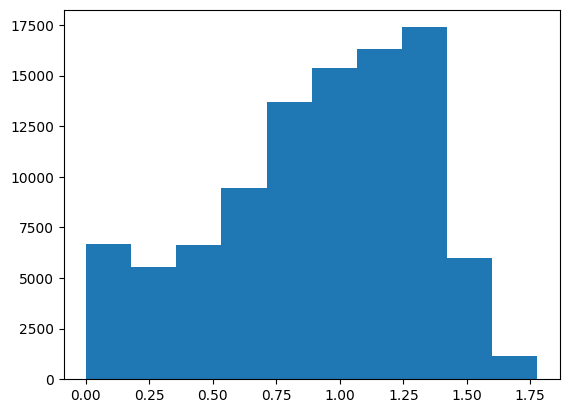

In [37]:
import matplotlib.pyplot as plt
plt.hist(ekin_array)

Text(0.5, 1.0, 'keine Ahnung')

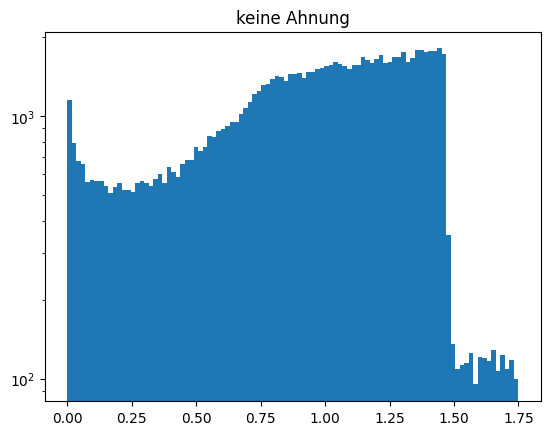

In [39]:
plt.hist(ekin_array, bins=100, range=(0,1.75))
plt.yscale('log')
plt.title("keine Ahnung")